<a href="https://colab.research.google.com/github/JGagacheva/JGagacheva/blob/main/grad_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Sampling and Collection** \\
* How were the data collected? \\
* Was there any potential bias introduced in the sampling process? \\
**Data Cleaning** \\
* What type of data are you currently exploring? \\
* What is the granularity of the data? \\
* What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries? \\

**Exploratory Data Analysis** \\
* Is there any correlation between the variables you are interested in exploring? 
* How would you cleanly and accurately visualize the relationship among variables?

**Data Modeling and Inferences**
Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project: Topic 1 - Dataset A, Topic 1 - Dataset C, Topic 2 - Dataset A, Topic 3 - Dataset A, Topic 3 - Dataset B. For datasets not mentioned above, you are welcome to continue building machine learning model(s). Otherwise, we will be placing more emphasis on the inference part instead.

---


**Here are a few components your notebook must address if your focus is on modeling:** \\
* What type of machine learning problem are you investigating? \\
* What model do you plan on using and why? \\
* Does your model require hyperparameter tuning? If so, how do you approach it? 
* How do you engineer the features for your model? What are the rationales behind selecting these features? \\
* How do you perform cross validation on your model? \\
* What loss metrics are you using to evaluate your model? \\
* From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting? \\
* How would you improve your model based on the outcome? \\

---


**If you are choosing to pursue your research question from an inference angle** 

Your notebook must demonstrate sufficient analysis and visualization to support your conclusion. \\
You must have a clearly constructed hypothesis test (including a clearly defined test statistic, significance level, and justification of chosen procedure) \\
We will not restrict you to the type of statistical test you conduct as there are many different statistical techniques that may apply to your case. However, we also ask that you provide detailed justification for the techniques you choose and how it allows you make those inferences.



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#pip install geopandas

In [ ]:
import pandas as pd
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import pickle
import shapely
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon
from shapely.affinity import scale
import plotly.express as px
from scipy.spatial.distance import cdist
import geopandas as gpd
%matplotlib inline

In [ ]:
# !pip install geopandas

Proposal: **We are interested in looking at how the patterns of various environmental factors might be correlated with the patterns of changes in plant biodiversity. Additionally, some studies have shown that the competition of pollinators may reduce the coexistence ability of plants, thus affecting plant diversity. As a result, we are interested in tying together these observations to extrapolate if plant diversity patterns affect animal diversity, more specifically affect the patterns of endangered species.** 

In [ ]:
# national_parks_biodiversity_parks = pd.read_csv('national_parks_biodiversity_parks.csv')
# national_parks_biodiversity_species = pd.read_csv('national_parks_biodiversity_species.csv')

# load and read files
biocon = pd.read_csv("bioCON_plant_diversity.txt", sep = "\t")
np_parks = pd.read_csv("national_parks_biodiversity_parks.csv")
np_species = pd.read_csv("national_parks_biodiversity_species.csv")
pollinators1 = pd.read_csv("plant_pollinator_diversity_set1.csv", dtype = str)
pollinators2 = pd.read_csv("plant_pollinator_diversity_set2.csv", dtype = str)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



# EDA for the national parks dataset

In [ ]:
np_parks.head(5)

Park Code               Park Name State   Acres  Latitude  Longitude
0      ACAD    Acadia National Park    ME   47390     44.35     -68.21
1      ARCH    Arches National Park    UT   76519     38.68    -109.57
2      BADL  Badlands National Park    SD  242756     43.75    -102.50
3      BIBE  Big Bend National Park    TX  801163     29.25    -103.25
4      BISC  Biscayne National Park    FL  172924     25.65     -80.08

In [ ]:
print("The National Parks dataset has:", np_parks.shape[0], "rows and", np_parks.shape[1], "columns.")

The National Parks dataset has: 56 rows and 6 columns.


In [ ]:
# type of data in np_parks
np_parks.dtypes

Park Code     object
Park Name     object
State         object
Acres          int64
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
#@title
# missing values in np_parks
np_parks.isnull().sum()

Park Code    0
Park Name    0
State        0
Acres        0
Latitude     0
Longitude    0
dtype: int64

In [ ]:
# centrality of np_parks
np_parks.describe()

Acres   Latitude   Longitude
count  5.600000e+01  56.000000   56.000000
mean   9.279291e+05  41.233929 -113.234821
std    1.709258e+06  10.908831   22.440287
min    5.550000e+03  19.380000 -159.280000
25%    6.901050e+04  35.527500 -121.570000
50%    2.387645e+05  38.550000 -110.985000
75%    8.173602e+05  46.880000 -103.400000
max    8.323148e+06  67.780000  -68.210000

In [ ]:
# unique values/category in np_parks
np_parks.nunique()

Park Code    56
Park Name    56
State        27
Acres        55
Latitude     53
Longitude    55
dtype: int64

In [ ]:
# A summary of the features in np_parks
np_parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [ ]:
# Map of national parks across the US
mapbox_access_token =  'pk.eyJ1IjoieWlnZXciLCJhIjoiY2w5MGM3bmlhMDZuNTQwbnNhNTZkZDVyMCJ9.SlG4lkkfPDUzLbsJjRByIw'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(np_parks, lat="Latitude", lon="Longitude",
                        size='Acres', #size_max=7, 
                        color_continuous_scale=px.colors.cyclical.Twilight, 
                        zoom=2.5,
                        #center=dict(lon=105, lat=38, ),
                        width=900,
                        height=600,
                        title = "Interactive map of sampled national parks across the US")
fig.show()

# EDA for Species in National Parks

In [ ]:
np_species.head(5)

Species ID             Park Name Category         Order    Family  \
0  ACAD-1000  Acadia National Park   Mammal  Artiodactyla  Cervidae   
1  ACAD-1001  Acadia National Park   Mammal  Artiodactyla  Cervidae   
2  ACAD-1002  Acadia National Park   Mammal     Carnivora   Canidae   
3  ACAD-1003  Acadia National Park   Mammal     Carnivora   Canidae   
4  ACAD-1004  Acadia National Park   Mammal     Carnivora   Canidae   

          Scientific Name                                       Common Names  \
0             Alces alces                                              Moose   
1  Odocoileus virginianus  Northern White-Tailed Deer, Virginia Deer, Whi...   
2           Canis latrans                             Coyote, Eastern Coyote   
3             Canis lupus        Eastern Timber Wolf, Gray Wolf, Timber Wolf   
4           Vulpes vulpes  Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...   

  Record Status     Occurrence  Nativeness Abundance Seasonality  \
0      Approved        Present      Native      Rare    Resident   
1      Approved        Present      Native  Abundant         NaN   
2      Approved        Present  Not Native    Common         NaN   
3      Approved  Not Confirmed      Native       NaN         NaN   
4      Approved        Present     Unknown    Common     Breeder   

  Conservation Status Unnamed: 13  
0                 NaN         NaN  
1                 NaN         NaN  
2  Species of Concern         NaN  
3          Endangered         NaN  
4                 NaN         NaN

In [ ]:
# type of data in np_species
np_species.dtypes

Species ID             object
Park Name              object
Category               object
Order                  object
Family                 object
Scientific Name        object
Common Names           object
Record Status          object
Occurrence             object
Nativeness             object
Abundance              object
Seasonality            object
Conservation Status    object
Unnamed: 13            object
dtype: object

In [ ]:
# missing values in np_species
np_species.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [ ]:
# centrality of np_species
np_species.describe()

Species ID                            Park Name        Category  \
count      119248                               119248          119248   
unique     119248                                   56              14   
top     ACAD-1000  Great Smoky Mountains National Park  Vascular Plant   
freq            1                                 6623           65221   

         Order      Family   Scientific Name Common Names Record Status  \
count   117776      117736            119248       119248        119248   
unique     554        2332             46022        35826            54   
top     Poales  Asteraceae  Falco peregrinus         None      Approved   
freq     11453        8843                56        27147         86254   

       Occurrence Nativeness Abundance Seasonality Conservation Status  \
count       99106      94203     76306       20157                4718   
unique          7          5         8          24                  11   
top       Present     Native   Unknown     Breeder  Species of Concern   
freq        83278      75950     28119       12214                3843   

       Unnamed: 13  
count            5  
unique           3  
top     Threatened  
freq             2

In [ ]:
# unique values/category in np_species
np_species.nunique()

Species ID             119248
Park Name                  56
Category                   14
Order                     554
Family                   2332
Scientific Name         46022
Common Names            35826
Record Status              54
Occurrence                  7
Nativeness                  5
Abundance                   8
Seasonality                24
Conservation Status        11
Unnamed: 13                 3
dtype: int64

In [ ]:
# A summary of the features in np_species
np_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
 13  Unnamed: 13          5 non-null       object
dtypes: object(14)
memory usage: 12.7+ MB


In [ ]:
# merge the species and national parks datasets
np_merged = np_species.merge(np_parks, how = "left", on = "Park Name")
np_merged.head(2)

Species ID             Park Name Category         Order    Family  \
0  ACAD-1000  Acadia National Park   Mammal  Artiodactyla  Cervidae   
1  ACAD-1001  Acadia National Park   Mammal  Artiodactyla  Cervidae   

          Scientific Name                                       Common Names  \
0             Alces alces                                              Moose   
1  Odocoileus virginianus  Northern White-Tailed Deer, Virginia Deer, Whi...   

  Record Status Occurrence Nativeness Abundance Seasonality  \
0      Approved    Present     Native      Rare    Resident   
1      Approved    Present     Native  Abundant         NaN   

  Conservation Status Unnamed: 13 Park Code State  Acres  Latitude  Longitude  
0                 NaN         NaN      ACAD    ME  47390     44.35     -68.21  
1                 NaN         NaN      ACAD    ME  47390     44.35     -68.21

In [ ]:
np_num_species = np_merged.groupby('Park Name')['Scientific Name'].count().to_frame()
np_num_species.reset_index()
np_num_species = np_num_species.rename(columns={'Scientific Name': 'number of species'})
np_num_species_merged = np_merged.merge(np_num_species, how = "left", on = "Park Name")
np_num_species_merged
# Map of national parks across the US
mapbox_access_token =  'pk.eyJ1IjoieWlnZXciLCJhIjoiY2w5MGM3bmlhMDZuNTQwbnNhNTZkZDVyMCJ9.SlG4lkkfPDUzLbsJjRByIw'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(np_num_species_merged, lat="Latitude", lon="Longitude",
                        color = 'number of species',
                        size='Acres',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=2.5,
                        #center=dict(lon=105, lat=38, ),
                        #width=900,
                        #height=600,
                        title = "Species diversity of sampled national parks across the US"
                        )
fig.show()

Text(0.5, 1.0, 'Species diversity and size of National Parks')

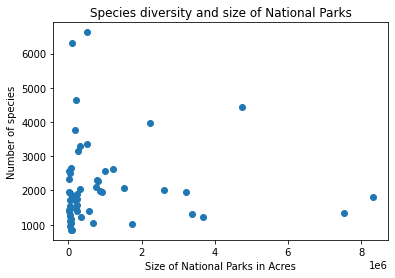

In [ ]:
np_num_species
np_parks
np_num_species_merged2 = np_parks.merge(np_num_species, how = "left", on = "Park Name")
np_num_species_merged2
plt.scatter(x=np_num_species_merged2['Acres'], y=np_num_species_merged2['number of species'])
plt.xlabel('Size of National Parks in Acres')
plt.ylabel('Number of species')
plt.title('Species diversity and size of National Parks')

Text(0.5, 1.0, 'Species diversity and Latitude')

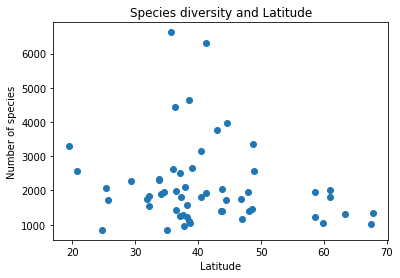

In [ ]:
plt.scatter(x=np_num_species_merged2['Latitude'], y=np_num_species_merged2['number of species'])
plt.xlabel('Latitude')
plt.ylabel('Number of species')
plt.title('Species diversity and Latitude')

In [ ]:
#
not_native =np_num_species_merged[np_num_species_merged['Nativeness']
                                  =='Native'].groupby('Park Name')['Nativeness'].count().to_frame().reset_index().rename({'Nativeness': 'Native count'}, axis=1)
Nativeness_tol =np_num_species_merged.groupby('Park Name')['Nativeness'].count().to_frame().reset_index().rename({'Nativeness': 'Nativeness count'}, axis=1)

Nativeness =Nativeness_tol.merge(not_native, on='Park Name')
Nativeness['native_ratio']=Nativeness['Native count']/Nativeness['Nativeness count']
native_merge = np_parks.merge(Nativeness, on='Park Name')

# Map of national parks Nativeness across the US
mapbox_access_token =  'pk.eyJ1IjoieWlnZXciLCJhIjoiY2w5MGM3bmlhMDZuNTQwbnNhNTZkZDVyMCJ9.SlG4lkkfPDUzLbsJjRByIw'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(native_merge, lat="Latitude", lon="Longitude",
                        color = 'native_ratio',
                        size='Acres',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=2.5,
                        #center=dict(lon=105, lat=38, ),
                        #width=900,
                        #height=600,
                        title = "Species Nativeness of sampled national parks across the US"
                        )
fig.show()

In [ ]:
print(native_merge.sort_values(by=['native_ratio']).head(2)[['Park Name', 'State','native_ratio']])
print(native_merge.sort_values(by=['native_ratio']).tail(3)[['Park Name', 'State','native_ratio']])

                     Park Name State  native_ratio
16  Dry Tortugas National Park    FL      0.430095
4       Biscayne National Park    FL      0.465592
                                         Park Name State  native_ratio
14               Denali National Park and Preserve    AK      0.973535
34                      Kobuk Valley National Park    AK      0.998492
18  Gates Of The Arctic National Park and Preserve    AK      0.998852


In [ ]:
#the two National Parks with lowest native ratio are islands in Florida, the highest three are in Alaska
# Why FLORIDA?


In [ ]:
np_merged['Conservation Status'].value_counts()
len(np_merged[np_merged['Conservation Status']=='Endangered'])

374

In [ ]:
ratio_conservation = np_merged.groupby('Park Name')\
                    .apply(lambda x: 1-x['Conservation Status']\
                    .isna().sum()/len(x))\
                    .sort_values(ascending=False)\
                    .to_frame('Ratio of species in conservation').reset_index()
conservation_merge = np_parks.merge(ratio_conservation, on='Park Name')

px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(conservation_merge, lat="Latitude", lon="Longitude",
                        color = 'Ratio of species in conservation',
                        size='Acres',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=2.5,
                        title = "Species conservation status of sampled national parks across the US"
                        )
fig.show()   
conservation_merge.sort_values(by='Ratio of species in conservation')
#The highest are in the South-west side of the US

Park Code                                       Park Name       State  \
18      GAAR  Gates Of The Arctic National Park and Preserve          AK   
48      SHEN                        Shenandoah National Park          VA   
35      LACL           Lake Clark National Park and Preserve          AK   
11      CONG                          Congaree National Park          SC   
24      GRSM             Great Smoky Mountains National Park      TN, NC   
12      CRLA                       Crater Lake National Park          OR   
34      KOVA                      Kobuk Valley National Park          AK   
45      ROMO                    Rocky Mountain National Park          CO   
53      YELL                       Yellowstone National Park  WY, MT, ID   
40      NOCA                    North Cascades National Park          WA   
14      DENA               Denali National Park and Preserve          AK   
44      REDW                           Redwood National Park          CA   
52      WRST  Wrangell - St Elias National Park and Preserve          AK   
20      GLBA          Glacier Bay National Park and Preserve          AK   
13      CUVA                   Cuyahoga Valley National Park          OH   
37      MACA                      Mammoth Cave National Park          KY   
19      GLAC                           Glacier National Park          MT   
32      KATM               Katmai National Park and Preserve          AK   
39      MORA                     Mount Rainier National Park          WA   
27      HALE                         Haleakala National Park          HI   
4       BISC                          Biscayne National Park          FL   
29      HOSP                       Hot Springs National Park          AR   
21      GRBA                       Great Basin National Park          NV   
28      HAVO                  Hawaii Volcanoes National Park          HI   
50      VOYA                         Voyageurs National Park          MN   
25      GRTE                       Grand Teton National Park          WY   
0       ACAD                            Acadia National Park          ME   
47      SEKI         Sequoia and Kings Canyon National Parks          CA   
41      OLYM                           Olympic National Park          WA   
33      KEFJ                      Kenai Fjords National Park          AK   
54      YOSE                          Yosemite National Park          CA   
30      ISRO                       Isle Royale National Park          MI   
49      THRO                Theodore Roosevelt National Park          ND   
31      JOTR                       Joshua Tree National Park          CA   
2       BADL                          Badlands National Park          SD   
36      LAVO                   Lassen Volcanic National Park          CA   
51      WICA                         Wind Cave National Park          SD   
22      GRCA                      Grand Canyon National Park          AZ   
46      SAGU                           Saguaro National Park          AZ   
26      GUMO               Guadalupe Mountains National Park          TX   
17      EVER                        Everglades National Park          FL   
43      PINN                         Pinnacles National Park          CA   
55      ZION                              Zion National Park          UT   
15      DEVA                      Death Valley National Park      CA, NV   
6       BRCA                      Bryce Canyon National Park          UT   
8       CARE                      Capitol Reef National Park          UT   
5       BLCA      Black Canyon of the Gunnison National Park          CO   
3       BIBE                          Big Bend National Park          TX   
7       CANY                       Canyonlands National Park          UT   
9       CAVE                  Carlsbad Caverns National Park          NM   
16      DRTO                      Dry Tortugas National Park          FL   
1       ARCH                            Arches Nati

In [ ]:
ratio_endangered = np_merged.groupby('Park Name')\
                    .apply(lambda x: len(x[x['Conservation Status']=='Endangered'])/len(x))\
                    .sort_values(ascending=False)\
                    .to_frame('Ratio of species endangered').reset_index()
endangered_merge = np_parks.merge(ratio_endangered, on='Park Name').sort_values(by='Ratio of species endangered')
endangered_merge

fig = px.scatter_mapbox(endangered_merge, lat="Latitude", lon="Longitude",
                        color = 'Ratio of species endangered',
                        size='Acres',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=2.5,
                        title = "Species conservation status of sampled national parks across the US")
fig.show() 
#highest two are in Hawaii
#National Parks with no endangered species are in Alaska(3), Colorado(1) and Montana(1), lowest are all inland

In [ ]:
endangered_merge

Park Code                                       Park Name       State  \
23      GRSA     Great Sand Dunes National Park and Preserve          CO   
18      GAAR  Gates Of The Arctic National Park and Preserve          AK   
34      KOVA                      Kobuk Valley National Park          AK   
14      DENA               Denali National Park and Preserve          AK   
19      GLAC                           Glacier National Park          MT   
53      YELL                       Yellowstone National Park  WY, MT, ID   
13      CUVA                   Cuyahoga Valley National Park          OH   
46      SAGU                           Saguaro National Park          AZ   
39      MORA                     Mount Rainier National Park          WA   
45      ROMO                    Rocky Mountain National Park          CO   
50      VOYA                         Voyageurs National Park          MN   
21      GRBA                       Great Basin National Park          NV   
48      SHEN                        Shenandoah National Park          VA   
40      NOCA                    North Cascades National Park          WA   
41      OLYM                           Olympic National Park          WA   
12      CRLA                       Crater Lake National Park          OR   
26      GUMO               Guadalupe Mountains National Park          TX   
43      PINN                         Pinnacles National Park          CA   
30      ISRO                       Isle Royale National Park          MI   
2       BADL                          Badlands National Park          SD   
25      GRTE                       Grand Teton National Park          WY   
35      LACL           Lake Clark National Park and Preserve          AK   
6       BRCA                      Bryce Canyon National Park          UT   
11      CONG                          Congaree National Park          SC   
0       ACAD                            Acadia National Park          ME   
5       BLCA      Black Canyon of the Gunnison National Park          CO   
1       ARCH                            Arches National Park          UT   
54      YOSE                          Yosemite National Park          CA   
24      GRSM             Great Smoky Mountains National Park      TN, NC   
47      SEKI         Sequoia and Kings Canyon National Parks          CA   
29      HOSP                       Hot Springs National Park          AR   
51      WICA                         Wind Cave National Park          SD   
49      THRO                Theodore Roosevelt National Park          ND   
9       CAVE                  Carlsbad Caverns National Park          NM   
31      JOTR                       Joshua Tree National Park          CA   
52      WRST  Wrangell - St Elias National Park and Preserve          AK   
55      ZION                              Zion National Park          UT   
44      REDW                           Redwood National Park          CA   
36      LAVO                   Lassen Volcanic National Park          CA   
8       CARE                      Capitol Reef National Park          UT   
22      GRCA                      Grand Canyon National Park          AZ   
20      GLBA          Glacier Bay National Park and Preserve          AK   
42      PEFO                  Petrified Forest National Park          AZ   
38      MEVE                        Mesa Verde National Park          CO   
3       BIBE                          Big Bend National Park          TX   
32      KATM               Katmai National Park and Preserve          AK   
37      MACA                      Mammoth Cave National Park          KY   
15      DEVA                      Death Valley National Park      CA, NV   
7       CANY                       Canyonlands National Park          UT   
16      DRTO                      Dry Tortugas National Park          FL   
4       BISC                          Biscayne National Park          FL   
33      KEFJ                      Kenai Fjords Nati

In [ ]:
np_merged.groupby('Category')\
        .apply(lambda x: 1-x['Conservation Status']\
        .isna().sum()/len(x))\
        .sort_values(ascending=False)\
        .to_frame('Ratio of species in conservation').reset_index()\
        .sort_values(by ='Ratio of species in conservation', ascending=False)
#Bird and Mammal are vulnerable

Category  Ratio of species in conservation
0                  Bird                          0.180193
1                Mammal                          0.175847
2             Amphibian                          0.134590
3               Reptile                          0.113924
4            Slug/Snail                          0.050826
5                  Fish                          0.038170
6          Invertebrate                          0.013410
7        Vascular Plant                          0.011699
8                Insect                          0.009826
9     Nonvascular Plant                          0.007246
10  Crab/Lobster/Shrimp                          0.003436
11      Spider/Scorpion                          0.001289
12                Fungi                          0.000645
13                Algae                          0.000000

# 

# EDA for bioCON data
_**How was the bioCON and pollinators data collected?**_

bioCON: The data in the bioCON dataset is a result of an experiment by the University of Minnesota's Cedar Creek Ecosystem Science Reserve. The aim of the experimental study was to understand plant communities, within the reserve, respond to changes in carbon, nitrogen, and biodiversity. 

_**Was there any potential bias introduced in the sampling process?**_

Although the three phenomena explored in the bioCON data from the experiment are events happening on a global scale, the experiment was conducted at only one location. Since biodiversity, carbon, and nitrogen levels are tightly dependent on geographic location, there is potential bias in this study introduced by the sampling frame. 

This dataset is most likely consisted of convenience samples. 


In [ ]:
# Check the structure of bioCON
biocon.head(15)

Year  Plot Ring CO2 Treatment Nitrogen Treatment  CountOfSpecies  \
0   2002     1    1       Cenrich               Namb               4   
1   2002     1    1       Cenrich               Namb               4   
2   2002     1    1       Cenrich               Namb               4   
3   2002     1    1       Cenrich               Namb               4   
4   2002     2    1       Cenrich               Namb               1   
5   2002     2    1       Cenrich               Namb               1   
6   2002     2    1       Cenrich               Namb               1   
7   2002     2    1       Cenrich               Namb               1   
8   2002     3    1       Cenrich            Nenrich               4   
9   2002     3    1       Cenrich            Nenrich               4   
10  2002     3    1       Cenrich            Nenrich               4   
11  2002     3    1       Cenrich            Nenrich               4   
12  2002     4    1       Cenrich               Namb               4   
13  2002     4    1       Cenrich               Namb               4   
14  2002     4    1       Cenrich               Namb               4   

    CountOfGroup Experiment         monospecies Monogroup Water Treatment  \
0              2          M                                                 
1              2          M                                                 
2              2          M                                                 
3              2          M                                                 
4              1          M  Bouteloua gracilis       C-4                   
5              1          M  Bouteloua gracilis       C-4                   
6              1          M  Bouteloua gracilis       C-4                   
7              1          M  Bouteloua gracilis       C-4                   
8              1          S                        Legume                   
9              1          S                        Legume                   
10             1          S                        Legume                   
11             1          S                        Legume                   
12             3          M                                                 
13             3          M                                                 
14             3          M                                                 

   Temp Treatment  Depth Carbon(%) Nitrogen(%)    C/N Ratio  
0                   0-10     0.618       0.074  8.351351351  
1                  10-20     0.515       0.057  9.035087719  
2                  20-40     0.142       0.023  6.173913043  
3                  40-60     0.132       0.016         8.25  
4                   0-10      0.55        0.07  7.857142857  
5                  10-20     0.477        0.06         7.95  
6                  20-40     0.199       0.032      6.21875  
7                  40-60     0.154       0.094  1.638297872  
8                   0-10     1.223       0.178  6.870786517  
9                  10-20     0.528       0.091  5.802197802  
10                 20-40     0.191       0.047  4.063829787  
11                 40-60     0.216       0.038  5.684210526  
12                  0-10     0.625       0.076  8.223684211  
13                 10-20     0.629       0.069  9.115942029  
14                 20-40     0.256       0.041  6.243902439

*Look at publication's DOI to better understand the data -- https://www.cedarcreek.umn.edu/research/data/dataset?ne141*

Cenrich - enriched CO2 treatment at 564ppm 

Camb - ambient CO2 treatment

Nenrich - 4g NH4NO3 per MeterSquared per year 

Namb - Ambient Nitrogen

Functional group - A functional group is merely a set of species, or collection of 
organisms, that share alike characteristics within a community. (from Wikipedia)

M - Part of Main experimental design, S = Part of a Subexperiment

H2Oneg - rain removal treament via portable rain shelters

H2Oamb - natural rain fall

HTelv - above and below ground warming treatment

HTamb - ambient temperature

In [ ]:
print("The bioCON dataset has:", biocon.shape[0], "rows and", biocon.shape[1], "columns.")

The bioCON dataset has: 5633 rows and 16 columns.


In [ ]:
# type of data in biocon
biocon.dtypes

Year                   int64
Plot                   int64
Ring                  object
CO2 Treatment         object
Nitrogen Treatment    object
CountOfSpecies         int64
CountOfGroup           int64
Experiment            object
monospecies           object
Monogroup             object
Water Treatment       object
Temp Treatment        object
Depth                 object
Carbon(%)             object
Nitrogen(%)           object
C/N Ratio             object
dtype: object

In [ ]:
# missing values in biocon
biocon.isnull().sum()

Year                  0
Plot                  0
Ring                  0
CO2 Treatment         0
Nitrogen Treatment    0
CountOfSpecies        0
CountOfGroup          0
Experiment            0
monospecies           0
Monogroup             0
Water Treatment       0
Temp Treatment        0
Depth                 0
Carbon(%)             0
Nitrogen(%)           0
C/N Ratio             0
dtype: int64

In [ ]:
# unique values/category in biocon
biocon.nunique()

Year                     4
Plot                   371
Ring                     7
CO2 Treatment            2
Nitrogen Treatment       2
CountOfSpecies           5
CountOfGroup             4
Experiment               2
monospecies             17
Monogroup                5
Water Treatment          3
Temp Treatment           3
Depth                    4
Carbon(%)             1990
Nitrogen(%)            709
C/N Ratio             3988
dtype: int64

In [ ]:
# A summary of the features in biocon
biocon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5633 entries, 0 to 5632
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                5633 non-null   int64 
 1   Plot                5633 non-null   int64 
 2   Ring                5633 non-null   object
 3   CO2 Treatment       5633 non-null   object
 4   Nitrogen Treatment  5633 non-null   object
 5   CountOfSpecies      5633 non-null   int64 
 6   CountOfGroup        5633 non-null   int64 
 7   Experiment          5633 non-null   object
 8   monospecies         5633 non-null   object
 9   Monogroup           5633 non-null   object
 10  Water Treatment     5633 non-null   object
 11  Temp Treatment      5633 non-null   object
 12  Depth               5633 non-null   object
 13  Carbon(%)           5633 non-null   object
 14  Nitrogen(%)         5633 non-null   object
 15  C/N Ratio           5633 non-null   object
dtypes: int64(4), object(12)


In [ ]:
biocon_Crich = biocon[biocon["CO2 Treatment"] == "Cenrich"]
biocon_Camb = biocon[biocon["CO2 Treatment"] == "Camb"]
biocon_Nrich = biocon[biocon["Nitrogen Treatment"] == "Nenrich"]
biocon_Namb = biocon[biocon["Nitrogen Treatment"] == "Namb"]
biocon_CN = biocon.loc[:, ["CountOfSpecies", "Carbon(%)", "Nitrogen(%)"]]

<function matplotlib.pyplot.show(*args, **kw)>

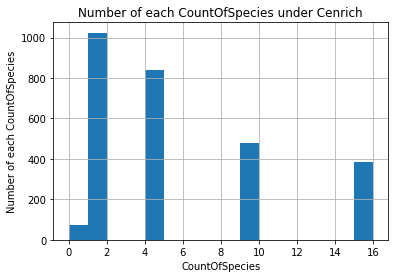

In [ ]:
plt.hist(biocon_Crich["CountOfSpecies"], bins = 16)
plt.title('Number of each CountOfSpecies under Cenrich')
plt.xlabel('CountOfSpecies')
plt.ylabel('Number of each CountOfSpecies')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

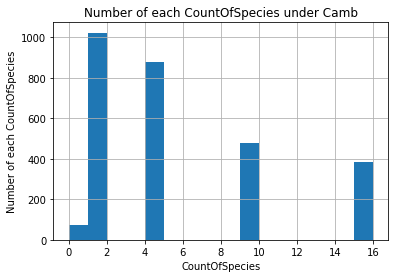

In [ ]:
plt.hist(biocon_Camb["CountOfSpecies"], bins = 16)
plt.title('Number of each CountOfSpecies under Camb')
plt.xlabel('CountOfSpecies')
plt.ylabel('Number of each CountOfSpecies')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

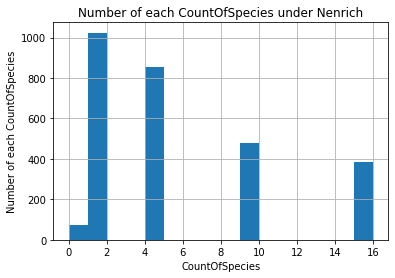

In [ ]:
plt.hist(biocon_Nrich["CountOfSpecies"], bins = 16)
plt.title('Number of each CountOfSpecies under Nenrich')
plt.xlabel('CountOfSpecies')
plt.ylabel('Number of each CountOfSpecies')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

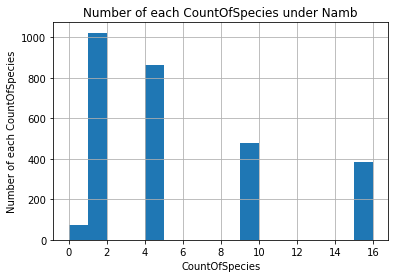

In [ ]:
plt.hist(biocon_Namb["CountOfSpecies"], bins = 16)
plt.title('Number of each CountOfSpecies under Namb')
plt.xlabel('CountOfSpecies')
plt.ylabel('Number of each CountOfSpecies')
plt.grid()
plt.show

In [ ]:
biocon_CN.drop([130, 693, 4323, 4563, 4571,4635, 4677, 4813, 5086, 5522])
biocon_CN = biocon_CN.apply(pd.to_numeric, errors="ignore")

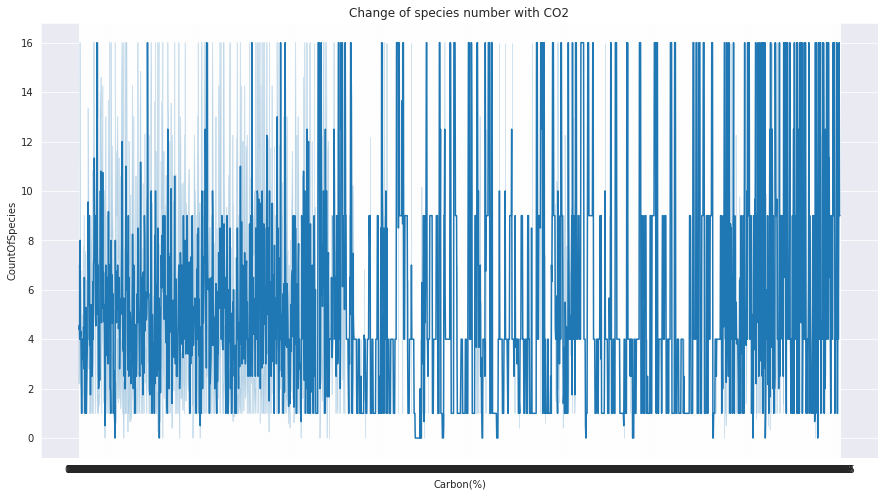

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
sns.lineplot(data=biocon, y='CountOfSpecies', x ='Carbon(%)')
plt.title("Change of species number with CO2")
plt.show()

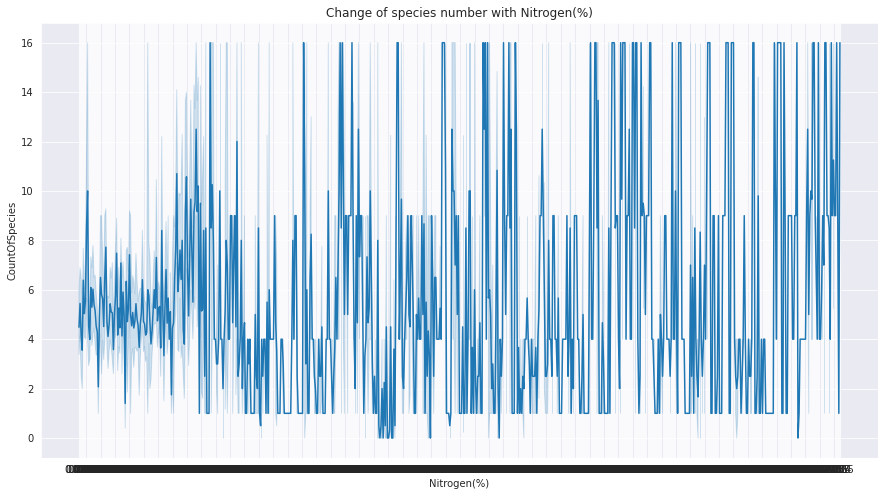

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
sns.lineplot(data=biocon, y='CountOfSpecies', x ='Nitrogen(%)')
plt.title("Change of species number with Nitrogen(%)")
plt.show()

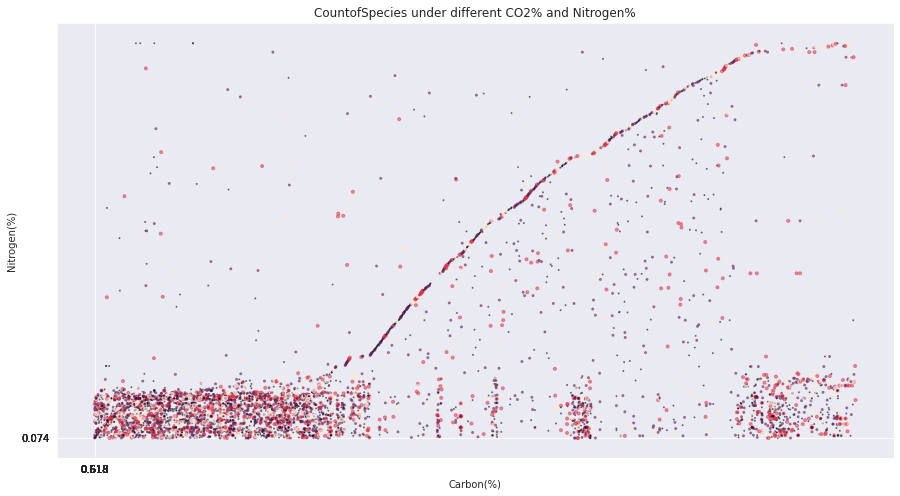

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
plt.scatter(biocon_CN['Carbon(%)'], biocon_CN['Nitrogen(%)'], s=biocon_CN['CountOfSpecies'], c=biocon_CN['CountOfSpecies'] , alpha=0.5, marker='o')
plt.xlabel('Carbon(%)')
plt.ylabel('Nitrogen(%)')
plt.title('CountofSpecies under different CO2% and Nitrogen%')
plt.xticks(np.arange(0.1, 1, step=0.01))
plt.yticks(np.arange(0, 0.3, step=0.05))
plt.show()

# EDA for pollinators 1 and 2
_**How was the pollinators data collected?**_

pollinators: The data on the pollinators was collected predominantly in Oregon -- Williametter National Forest and HJ Andrews Forest. The aim of the study that collected the data was to explore how various factors, such as meadow size, amount of habitat, wetaher, soil moisture, etc., affect the occurance of plant-pollinator interactions. 

_**Was there any potential bias introduced in the sampling process?**_

Similar conclusion follows for the pollintor datasets -- since these statistics are location dependent, it is hard to draw global conclusions from the analysis done on the data from this study. 

These datasets are most likely convenience samples. 


In [ ]:
pollinators1.head(5) 

DBCODE ENTITY     COMPLEX MEADOW PLOT_ID  YEAR  SAMPLEDATE WATCH OBSERVER  \
0  SA026      1  Bunchgrass     BD   BGD01  2011  2011-07-24     2      NaN   
1  SA026      1  Bunchgrass     BD   BGD01  2011  2011-07-24     2      NaN   
2  SA026      1  Bunchgrass     BD   BGD01  2011  2011-07-24     2      NaN   
3  SA026      1  Bunchgrass     BD   BGD01  2011  2011-07-24     2      NaN   
4  SA026      1  Bunchgrass     BD   BGD01  2011  2011-07-24     2      NaN   

  PLOT  ... PPI_STATUS NO_INT PLTSP_CODE            PLTSP_NAME VISSP_CODE  \
0    1  ...          1      2   ACHIMILL  Achillea millefolium   EPICPUNC   
1    1  ...          1      1   ACHIMILL  Achillea millefolium    EVYLS5M   
2    1  ...          1      2   ERIGFOLI     Erigeron foliosus   MUSCGEN3   
3    1  ...          1      2   ERIGFOLI     Erigeron foliosus   MUSCGEN3   
4    1  ...          1      2   ERIGFOLI     Erigeron foliosus   TRICORNA   

              VISSP_NAME               VISSP_TYPE REF_NO VISSP_NO QC_NOTES  
0  Epicauta puncticollis        predaceous beetle    NaN        1      NaN  
1         Evylaeus sp 5M            halictine bee    NaN        1      NaN  
2        Muscoid genus 3  herbivorous muscoid fly    NaN        1      NaN  
3        Muscoid genus 3  herbivorous muscoid fly    NaN        2      NaN  
4      Trichodes ornatus     bee-parasitic beetle    NaN        1      NaN  

[5 rows x 26 columns]

In [ ]:
pollinators2.head(5)

DBCODE ENTITY     COMPLEX MEADOW PLOT_ID  YEAR  SAMPLEDATE WATCH   OBSERVER  \
0  SA026      2  Bunchgrass     BD   BGD01  2011  2011-07-20     1         ND   
1  SA026      2  Bunchgrass     BD   BGD01  2011  2011-07-25     2       Andy   
2  SA026      2  Bunchgrass     BD   BGD01  2011  2011-07-25     2       Andy   
3  SA026      2  Bunchgrass     BD   BGD01  2011  2011-07-25     2       Andy   
4  SA026      2  Bunchgrass     BD   BGD01  2011  2011-08-02     3  Andy, Tim   

  PLOT FLW_STATUS PLTSP_CODE            PLTSP_NAME NO_STALK NO_FLWS QC_NOTES  
0    1        NaN        NaN                   NaN      NaN     NaN      NaN  
1    1        FLW   ACHIMILL  Achillea millefolium        4    36.0      NaN  
2    1        FLW   ERIGFOLI     Erigeron foliosus       14     1.0      NaN  
3    1        FLW   VICIAMER       Vicia americana        3     2.3      NaN  
4    1        FLW   ACHIMILL  Achillea millefolium        2    26.0      NaN

In [ ]:
print("The Pollinators 1 dataset has:", pollinators1.shape[0], "rows and", pollinators1.shape[1], "columns."
     "The Pollinators 2 dataset has:", pollinators2.shape[0], "rows and", pollinators2.shape[1], "columns.")

The Pollinators 1 dataset has: 74131 rows and 26 columns.The Pollinators 2 dataset has: 22619 rows and 16 columns.


In [ ]:
# type of data in pollinators 1 and 2
print("Pollinators 1 dtype:", pollinators1.dtypes)
print("Pollinators 2 dtype:", pollinators2.dtypes)

Pollinators 1 dtype: DBCODE        object
ENTITY        object
COMPLEX       object
MEADOW        object
PLOT_ID       object
YEAR          object
SAMPLEDATE    object
WATCH         object
OBSERVER      object
PLOT          object
START_TIME    object
END_TIME      object
MINUTE        object
CLOUDS        object
WIND          object
TEMP          object
PPI_STATUS    object
NO_INT        object
PLTSP_CODE    object
PLTSP_NAME    object
VISSP_CODE    object
VISSP_NAME    object
VISSP_TYPE    object
REF_NO        object
VISSP_NO      object
QC_NOTES      object
dtype: object
Pollinators 2 dtype: DBCODE        object
ENTITY        object
COMPLEX       object
MEADOW        object
PLOT_ID       object
YEAR          object
SAMPLEDATE    object
WATCH         object
OBSERVER      object
PLOT          object
FLW_STATUS    object
PLTSP_CODE    object
PLTSP_NAME    object
NO_STALK      object
NO_FLWS       object
QC_NOTES      object
dtype: object


In [ ]:
# missing data in pollinators 1 and 2
print("Pollinators 1 number of missing values/column:", pollinators1.isnull().sum())
print("Pollinators 2 number of missing values/column:", pollinators2.isnull().sum())

Pollinators 1 number of missing values/column: DBCODE            0
ENTITY            0
COMPLEX           0
MEADOW            0
PLOT_ID           0
YEAR              0
SAMPLEDATE        0
WATCH             0
OBSERVER      11786
PLOT              0
START_TIME    10850
END_TIME      66630
MINUTE          153
CLOUDS          394
WIND            271
TEMP          27692
PPI_STATUS        0
NO_INT           53
PLTSP_CODE    13860
PLTSP_NAME    13860
VISSP_CODE    13860
VISSP_NAME    13860
VISSP_TYPE    35537
REF_NO        58956
VISSP_NO          0
QC_NOTES      70543
dtype: int64
Pollinators 2 number of missing values/column: DBCODE            0
ENTITY            0
COMPLEX           0
MEADOW            0
PLOT_ID           0
YEAR              0
SAMPLEDATE        0
WATCH             0
OBSERVER        685
PLOT              0
FLW_STATUS      776
PLTSP_CODE      560
PLTSP_NAME      560
NO_STALK       1167
NO_FLWS        1164
QC_NOTES      17224
dtype: int64


In [ ]:
# centrality of pollinators1
pollinators1.describe()

DBCODE ENTITY   COMPLEX MEADOW PLOT_ID   YEAR  SAMPLEDATE  WATCH  \
count   74131  74131     74131  74131   74131  74131       74131  74131   
unique      1      1         5     18     180      8         198      8   
top     SA026      1  Frissell     M2   FM204   2018  2018-07-12      2   
freq    74131  74131     30278  12139    1521  12219        2032  17928   

       OBSERVER   PLOT  ... PPI_STATUS NO_INT PLTSP_CODE      PLTSP_NAME  \
count     62345  74131  ...      74131  74078      60271           60271   
unique       61     10  ...          2     63        146             146   
top        Andy      2  ...          1      1   GILICAPI  Gilia capitata   
freq       4098   8560  ...      60271  28423      11528           11528   

       VISSP_CODE      VISSP_NAME  VISSP_TYPE     REF_NO VISSP_NO  \
count       60271           60271       38594      15175    74131   
unique        796             797          77       4800       35   
top      APISMELL  Apis mellifera  social bee  no number        1   
freq        13769           13769       16547       3709    55400   

                             QC_NOTES  
count                            3588  
unique                            126  
top      change on temp: from 0 to -9  
freq                             1953  

[4 rows x 26 columns]

In [ ]:
# centrality of pollinators2
pollinators2.describe()

DBCODE ENTITY   COMPLEX MEADOW PLOT_ID   YEAR  SAMPLEDATE  WATCH  \
count   22619  22619     22619  22619   22619  22619       22619  22619   
unique      1      1         5     18     180      8         214      8   
top     SA026      2  Frissell     M2   FM202   2011  2012-07-12      2   
freq    22619  22619      7612   2834     314   3943         340   5594   

       OBSERVER   PLOT FLW_STATUS PLTSP_CODE           PLTSP_NAME NO_STALK  \
count     21934  22619      21843      22059                22059    21452   
unique       97     10          2        198                  198      320   
top        Vera      1        FLW   ERIOLANA  Eriophyllum lanatum        1   
freq       2476   2418      21800       1895                 1895     3508   

       NO_FLWS                                           QC_NOTES  
count    21455                                               5395  
unique     409                                                126  
top        1.0   change on flw_status: to be FLW because both ...  
freq      5922                                               2412

In [ ]:
# unique values/category in pollinators 1 and 2
print("Pollinators 1 number of unique values/column:", pollinators1.nunique())
print("Pollinators 2 number of unique values/column:", pollinators2.nunique())

Pollinators 1 number of unique values/column: DBCODE           1
ENTITY           1
COMPLEX          5
MEADOW          18
PLOT_ID        180
YEAR             8
SAMPLEDATE     198
WATCH            8
OBSERVER        61
PLOT            10
START_TIME     486
END_TIME       303
MINUTE          15
CLOUDS           4
WIND             2
TEMP            35
PPI_STATUS       2
NO_INT          63
PLTSP_CODE     146
PLTSP_NAME     146
VISSP_CODE     796
VISSP_NAME     797
VISSP_TYPE      77
REF_NO        4800
VISSP_NO        35
QC_NOTES       126
dtype: int64
Pollinators 2 number of unique values/column: DBCODE          1
ENTITY          1
COMPLEX         5
MEADOW         18
PLOT_ID       180
YEAR            8
SAMPLEDATE    214
WATCH           8
OBSERVER       97
PLOT           10
FLW_STATUS      2
PLTSP_CODE    198
PLTSP_NAME    198
NO_STALK      320
NO_FLWS       409
QC_NOTES      126
dtype: int64


In [ ]:
# A summary of the features in pollinators 1 and 2
pollinators1.info()
pollinators2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74131 entries, 0 to 74130
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DBCODE      74131 non-null  object
 1   ENTITY      74131 non-null  object
 2   COMPLEX     74131 non-null  object
 3   MEADOW      74131 non-null  object
 4   PLOT_ID     74131 non-null  object
 5   YEAR        74131 non-null  object
 6   SAMPLEDATE  74131 non-null  object
 7   WATCH       74131 non-null  object
 8   OBSERVER    62345 non-null  object
 9   PLOT        74131 non-null  object
 10  START_TIME  63281 non-null  object
 11  END_TIME    7501 non-null   object
 12  MINUTE      73978 non-null  object
 13  CLOUDS      73737 non-null  object
 14  WIND        73860 non-null  object
 15  TEMP        46439 non-null  object
 16  PPI_STATUS  74131 non-null  object
 17  NO_INT      74078 non-null  object
 18  PLTSP_CODE  60271 non-null  object
 19  PLTSP_NAME  60271 non-null  object
 20  VISSP_

**What type of data are you currently exploring?
What is the granularity of the data? What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?**

**national parks:** The first dataset, which contains all the national parks is pretty simple. Each row represents a different national park, and each column contains different feature of the national park. There are 56 unique national parks present. There are 63 total national parks in the US. And it seems like there is no missing value in this data.

**national parks -- species:** 
Each row in the dataset represents one individual animal that has an associated unique identifier (ID). The ID has two parts -- national park abbrevation, to signify in which natual park the animal is found, and number, to signify the unique number given to that animal.  For each individual, there is data such as national park, species name, common name, whether it is an endangered species or not, etc. And there are 7 items have missing values, including Order, Family, Occurrence, Nativeness, etc.


**bioCON:** Each row represents an experimental observation at different soil depth for each experiment. The values (columns) that describe each observation are whether it is a single species or a group of species, the amount of carbon, nitrogen, any special treatment performed on the experimental group, etc. There is no missing data.

**pollinator1**:
Each row represents the observation value of plant pollinator interaction data from plot watches in montane meadows in each period of time. The columns describe meadow complex, meadow name, survey date, weather presence, temperature at plot watch, number of Interactions of a specific visitor (pollinator) to a given plant species in one minute, plant and vistor species, etc. And there are 15 items have missing values, including Observer, Start_Time, End_Time, etc.

**pollinator2**:
A little different from pollinator1, each row in this dataset represents one observation value of flowering plant surveys from plant-pollinator interaction in montane meadows in each period of time. The columns describe meadow complex, meadow name, number of stalks, number of flowers per stalk, presence or absence of flowers in anthesis, meadow plot exhaustively surveyed for blooming flowers and plant-pollinator interactions, etc. And it seems like there are 7 columns have missing values, including Flw_Status, Pltsp_Code, Pltsp_name, No_Stalk, No_Flws, etc.

**Due to the differences between the two CSVs, it was very hard to join pollinators 1 and 2. Additionally, pollinators 2 does not actually contain any data on pollinators, so I decided to just move ahead with the pollinators 1 dataset.**

In [ ]:
count_plants = pollinators1.groupby("VISSP_NAME").agg({"PLTSP_NAME":"count"}).sort_values(by = "PLTSP_NAME", ascending = False)
pollinators = pollinators1.merge(count_plants, on = "VISSP_NAME")
pollinators = pollinators.rename(columns = {"PLTSP_NAME_y":"PLTSP_COUNT", "PLTSP_NAME_x":"PLTSP_NAME"})

pollinators_top = pollinators.loc[:, ["PLTSP_NAME", "PLTSP_COUNT", "VISSP_NAME", "VISSP_CODE", "YEAR", "TEMP"]]
pollinators_top = pollinators_top[pollinators_top["PLTSP_COUNT"] > 1200]

In [ ]:
# Pivot table for top pollinators
pivot = pd.pivot_table(pollinators_top, index = "VISSP_NAME", columns = "YEAR", values = "PLTSP_COUNT", aggfunc = "sum")
pivot_log = np.log10(pivot)

### Time-series analysis of the top eight pollinators. ###
> The joint plot, although might not seem over-plotted at first sight, it definitely hard to discern the individual time pattern for each pollinator.  
> Continue with individual time-series subplots for each pollinator. 

Text(0.5, 1.0, 'Yearly proportion of plants pollinated by top pollinators')

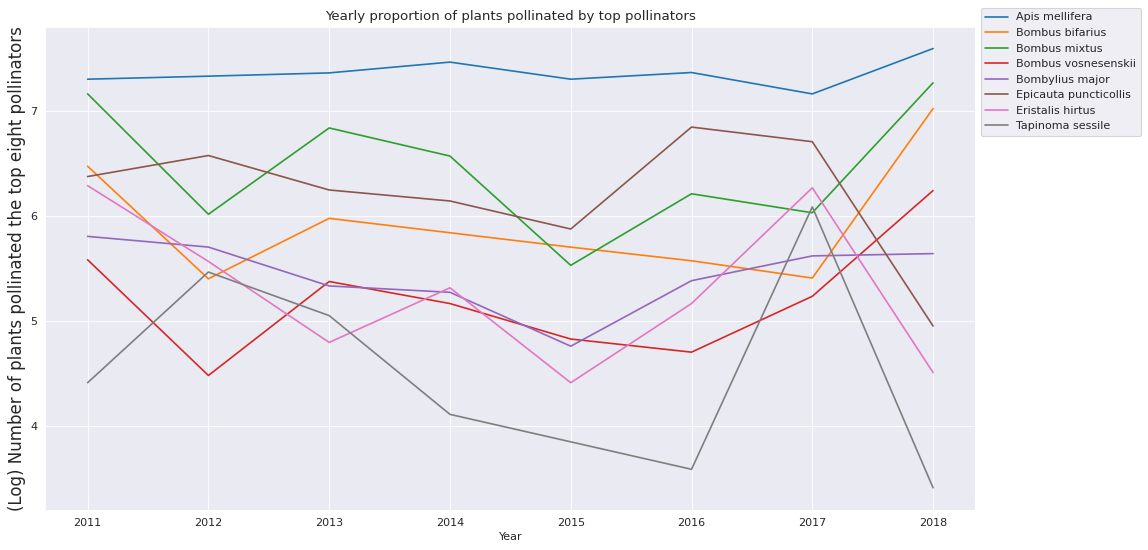

In [ ]:
pollinator_names = np.array(pivot.index)
plt.figure(figsize = (15,8), dpi = 80)
for pollinator in pollinator_names:
    fig = sns.lineplot(data = pivot_log.loc[pollinator])
plt.legend(pollinator_names, bbox_to_anchor=(1, 1.05))
fig.set_ylabel("(Log) Number of plants pollinated the top eight pollinators", fontsize = 15)
fig.set_xlabel("Year")
plt.title("Yearly proportion of plants pollinated by top pollinators")

# pollinators

Text(0.5, 0.98, 'Individual plots for the proportion of plants pollinated by each top pollinator over time')

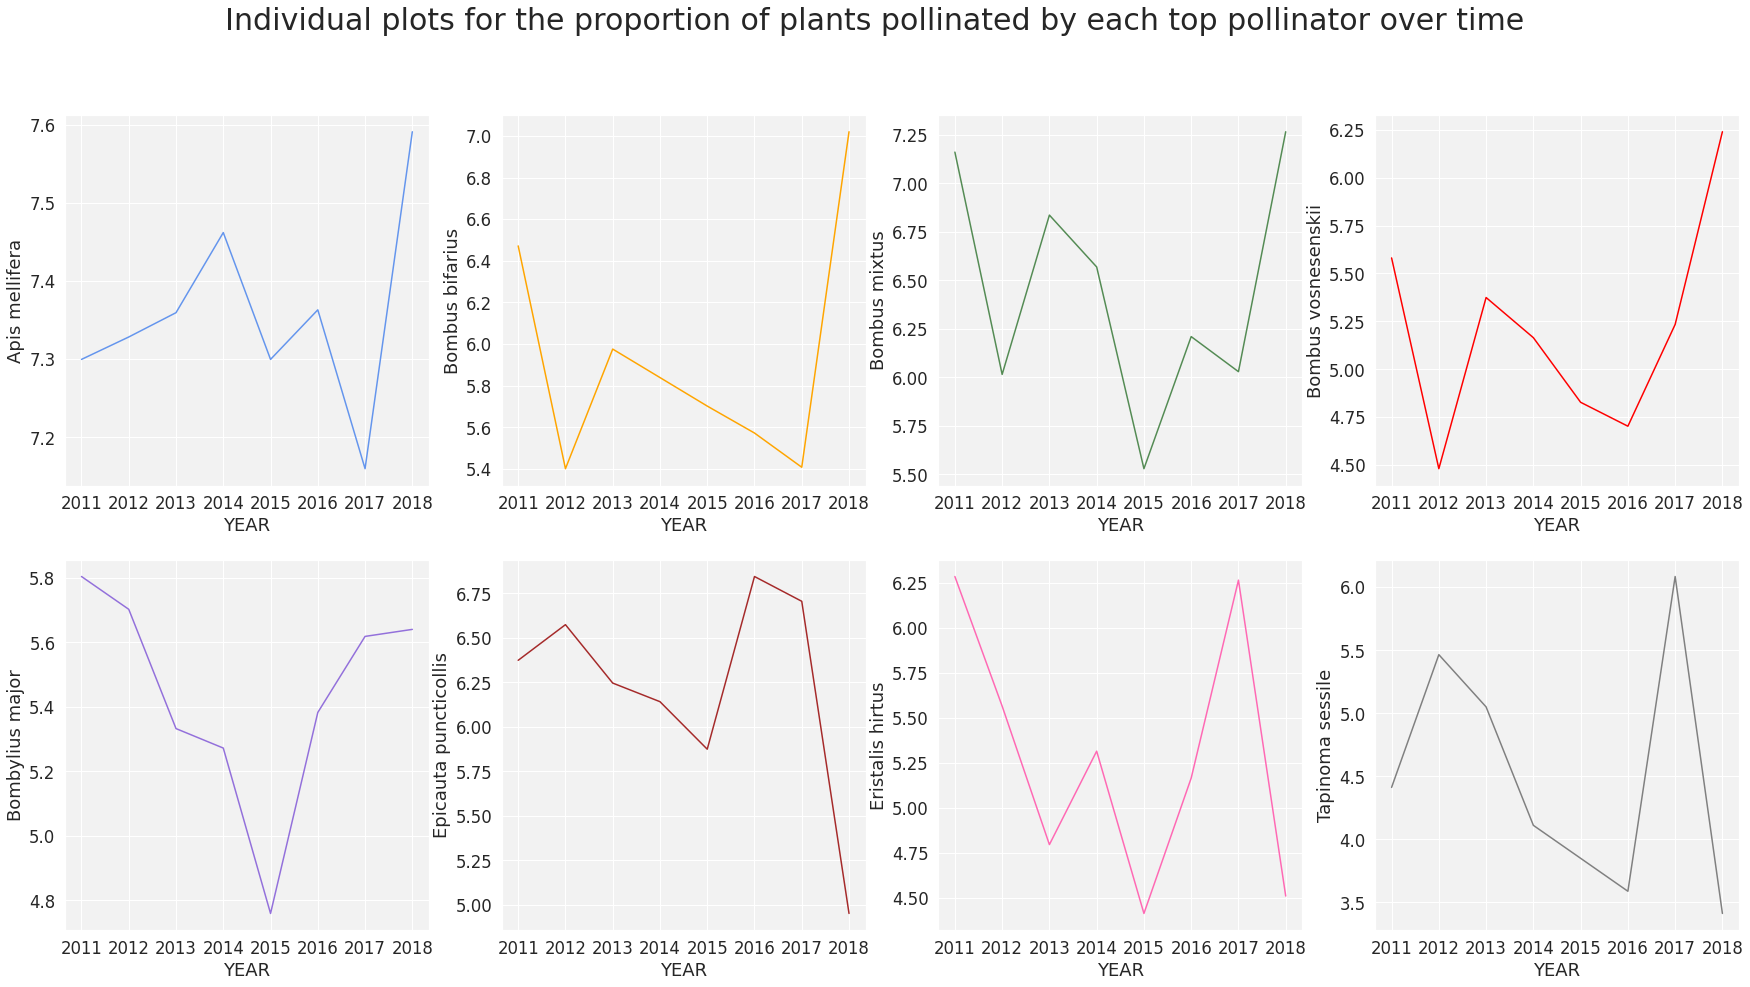

In [ ]:
sns.set(font_scale = 1.5, rc={'axes.facecolor':'#F2F2F2', 'figure.facecolor':'white'})
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
sns.lineplot(data = pivot_log.loc["Apis mellifera"], ax = axs[0, 0], color = "cornflowerblue")
sns.lineplot(data = pivot_log.loc["Bombus bifarius"], ax = axs[0, 1], color = "orange")
sns.lineplot(data = pivot_log.loc["Bombus mixtus"], ax = axs[0, 2], color = "#548B54")
sns.lineplot(data = pivot_log.loc["Bombus vosnesenskii"], ax = axs[0, 3], color = "red")
sns.lineplot(data = pivot_log.loc["Bombylius major"], ax = axs[1, 0], color = "#9370DB")
sns.lineplot(data = pivot_log.loc["Epicauta puncticollis"], ax = axs[1, 1], color = "brown")
sns.lineplot(data = pivot_log.loc["Eristalis hirtus"], ax = axs[1, 2], color = "#FF69B4")
sns.lineplot(data = pivot_log.loc["Tapinoma sessile"], ax = axs[1, 3], color = "gray")

# plt.labels = {"x": "Year", "y":"Number (log) of plants pollinated by a pollinator"}
fig.suptitle("Individual plots for the proportion of plants pollinated by each top pollinator over time", fontsize = 30)

**It is interesting to note that in most of these plots, they either dip or go down in 2015, but go up in 2018 (except for the last 3). Maybe look at the per family/type of pollinator trends?**

**Time-series analysis per pollinator code.**

Text(0.5, 1.0, 'Time-series analysis for the proportion of plants pollinated by each type of pollinator over time')

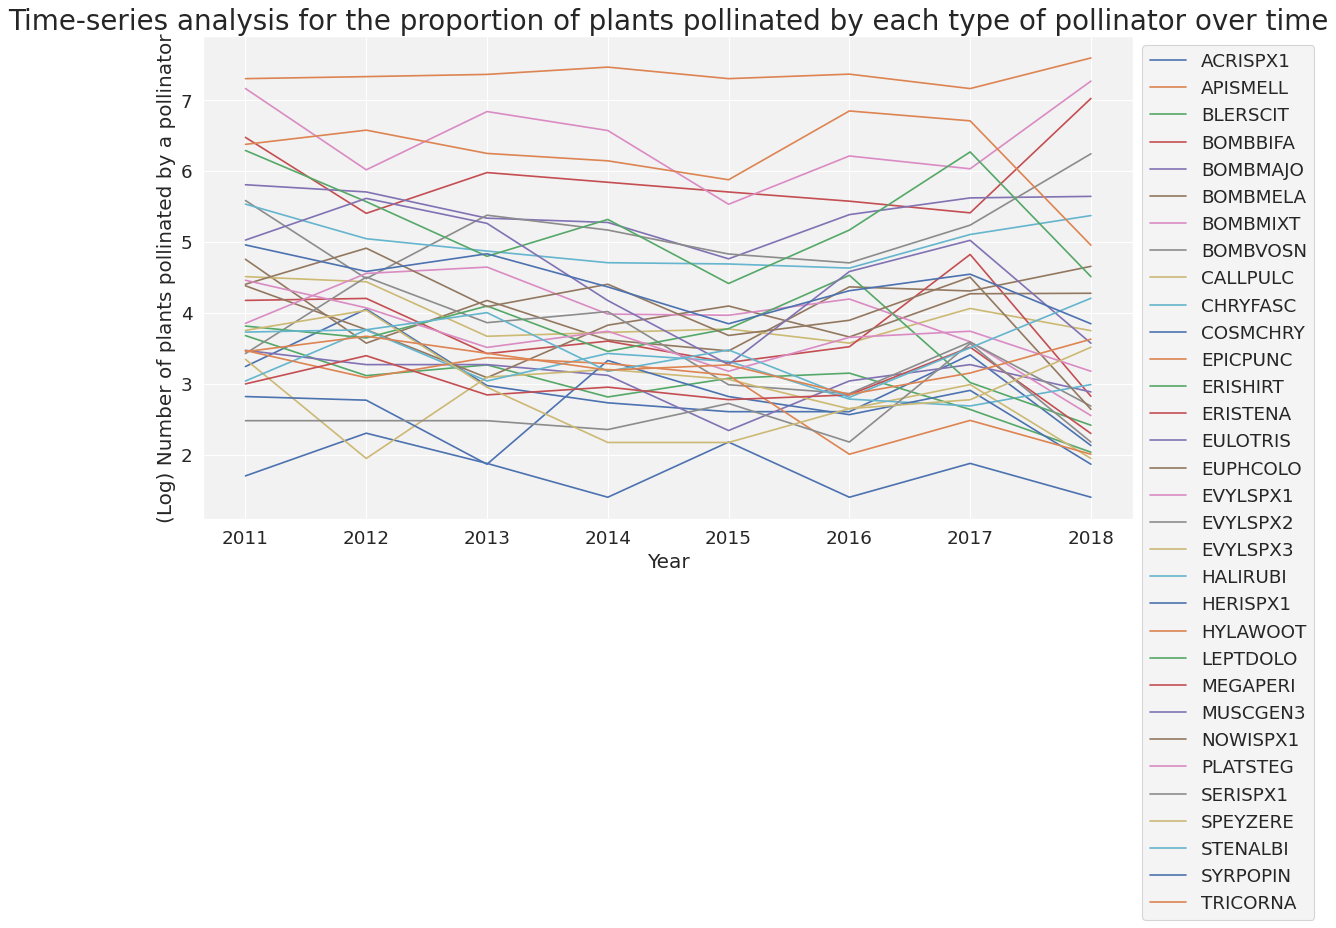

In [ ]:
# Pivot table for pollinating families
pivot_code = pd.pivot_table(pollinators, index = "VISSP_CODE", columns = "YEAR", values = "PLTSP_COUNT", aggfunc = "sum")

#take only the codes that have observation across all years
pivot_code = pivot_code.dropna()
pivot_code_log = np.log10(pivot_code)

plt.figure(figsize=(15, 8), dpi = 80)

for pollinator in pivot_code_log.index:
    fig = sns.lineplot(data = pivot_code_log.loc[pollinator])
fig.legend(pivot_code_log.index, bbox_to_anchor=(1, 1))
fig.set_xlabel("Year")
fig.set_ylabel('(Log) Number of plants pollinated by a pollinator')
fig.set_title("Time-series analysis for the proportion of plants pollinated by each type of pollinator over time", fontsize = 25)


Text(0.5, 1.0, 'Time-series analysis for the proportion of plants pollinated by each type of pollinator over time')

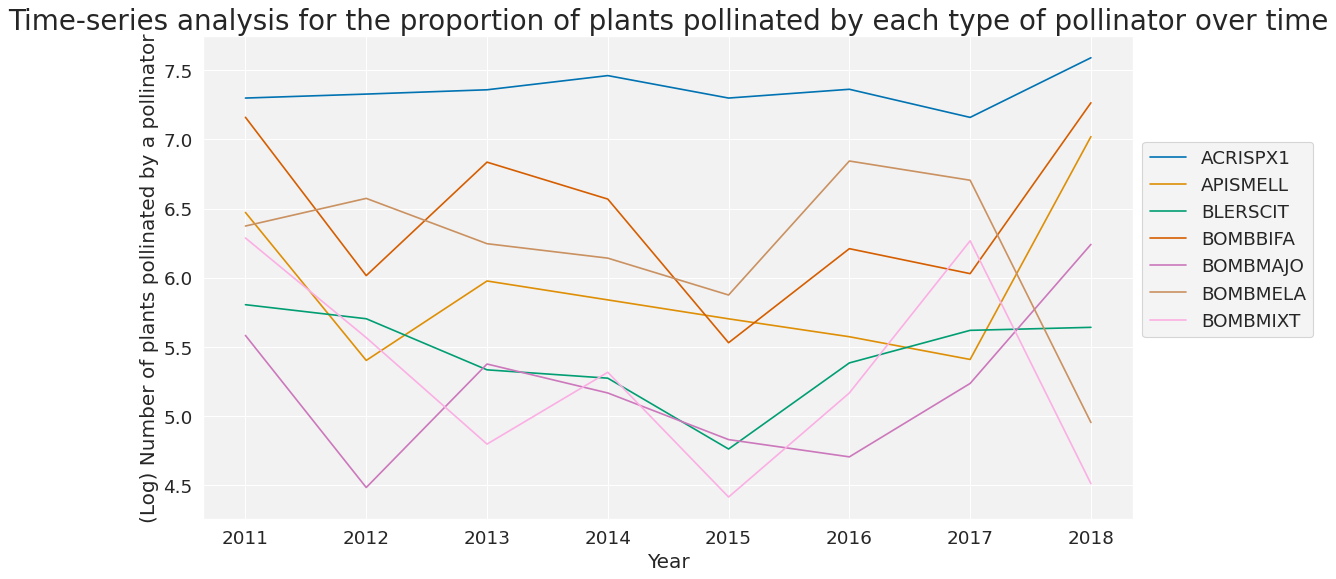

In [ ]:
top_codes = list(set(pollinators_top["VISSP_CODE"]))
top_codes_pivot = pivot_code_log.loc[pivot_code_log.index.isin(top_codes)]


plt.figure(figsize=(15, 8), dpi = 80)
sns.set_palette("colorblind")

for top_code in top_codes_pivot.index:
    fig = sns.lineplot(data = top_codes_pivot.loc[top_code])

fig.legend(pivot_code_log.index, bbox_to_anchor=(1, 0.8))
fig.set_xlabel("Year")
fig.set_ylabel('(Log) Number of plants pollinated by a pollinator')
fig.set_title("Time-series analysis for the proportion of plants pollinated by each type of pollinator over time", fontsize = 25)



**Conclusion from time-series analysis: The plot for representing the CODE for the top pollinators does not look any different than just representing the top pollinators by name. Additionally, the total codes plot is a bit over-plotted, I think it would be more interesting to introduce some more variables, such as weather conditions, to further explore the relationship between number of plants polinated and pollinators.**

###Look at the relationship between weather conditions -- temperature -- and plants pollinated.###

Text(0.5, 1.0, 'Time-series analysis for the proportion of plants pollinated at certain temperatures')

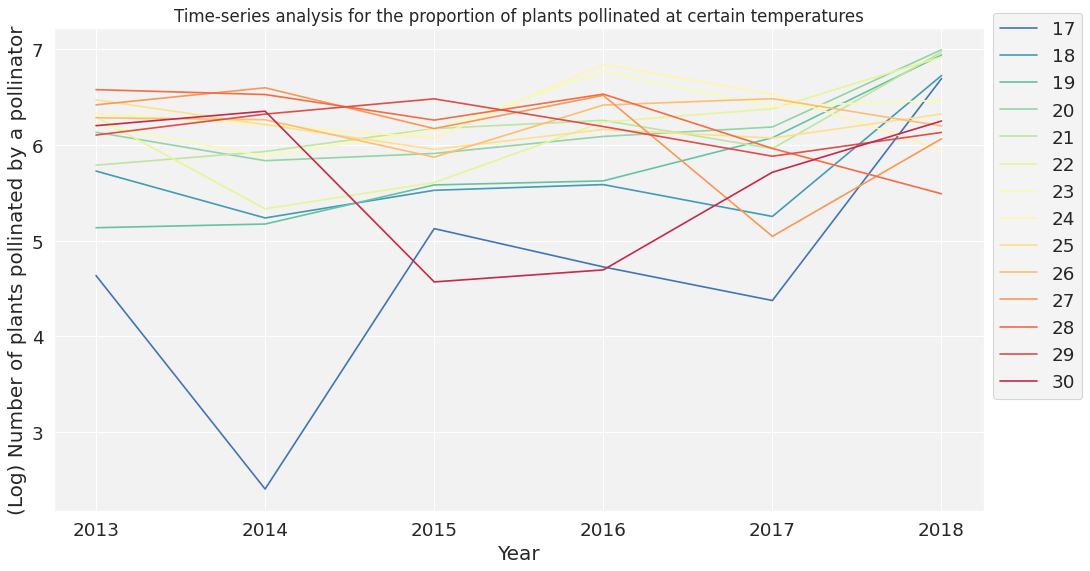

In [ ]:
temperatures = pollinators[~pollinators["TEMP"].isnull()]

# pivot table for number of pollinated plates over time
pivot_temps = pd.pivot_table(temperatures, index = "TEMP", columns = "YEAR", values = "PLTSP_COUNT", aggfunc = "sum")
pivot_temps = pivot_temps.dropna()
pivot_temps_log = np.log10(pivot_temps)
pivot_temps_log

plt.figure(figsize = (15, 8), dpi = 80)
# sns.color_palette("Spectral", n_colors = 14);
sns.set_palette("Spectral_r", n_colors = 14),

for temp in pivot_temps_log.index:
    fig = sns.lineplot(data = pivot_temps_log.loc[temp])

fig.legend(pivot_temps_log.index, bbox_to_anchor=(1, 1.05))
fig.set_xlabel("Year")
fig.set_ylabel('(Log) Number of plants pollinated by a pollinator')
fig.set_title("Time-series analysis for the proportion of plants pollinated at certain temperatures", fontsize = 15)

The two extreme temperatures, 17 and 30C, look interesting and like outliers from the standard pattern. 

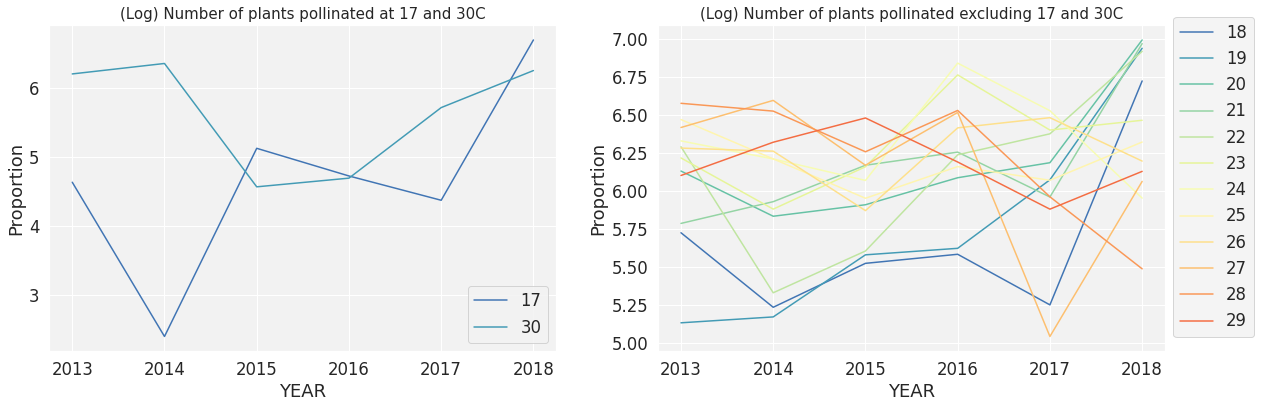

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.set_palette("Spectral_r", n_colors = 12);

for temp in ["17", "30"]:
    fig = sns.lineplot(data = pivot_temps_log.loc[temp], ax = axs[0])
fig.set_title('(Log) Number of plants pollinated at 17 and 30C', fontsize = 15)
fig.set_ylabel("Proportion")
fig.legend(["17", "30"])

for temp in ['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']:
    fig = sns.lineplot(data = pivot_temps_log.loc[temp], ax = axs[1])
fig.set_title('(Log) Number of plants pollinated excluding 17 and 30C', fontsize = 15)
fig.set_ylabel("Proportion")
fig.legend(['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'], bbox_to_anchor = (1, 1.05)) 


Observations from these time-analysis:
> The proportion of pollinated plants seems to increase a lot in 2018 compares to other years. However, this observation might be biased because there are a lot more samples points in 2018, compares to the previous years. 

> Despite the over-plotting, the recorded temperatures at 17C and 30C stand out in the combined time-series analysis. It is especially interesting that in 2014, these two extreme temperatures have a very large difference in the proportion of pollinated plants. Compared to two years later, when there are approximately the same number of pollinated plants in both the 17C and 30C conditions. Just by looking at the temperature and proportion of plants pollinated, I think it's not enough to conclude why we're obsering these changing patterns over the years. It might be worth taking into account the other weather conditions as well. Additionally, maybe we'll see some other interesting patterns in 2014 and 2016 in the other datasets. 

In [ ]:
temperatures.groupby(['PLTSP_NAME', "TEMP", 'CLOUDS', "WIND"])['PLTSP_NAME'].count().unstack("CLOUDS").dropna() #nice group by


CLOUDS                                C     PC      S    SH
PLTSP_NAME              TEMP WIND                          
Achillea millefolium    22   ST     1.0    3.0   44.0   1.0
Cirsium callilepis      24   ST     4.0   14.0   22.0  12.0
                        25   ST     1.0    1.0   55.0  25.0
                        27   ST     1.0    6.0   32.0   3.0
Delphinium nuttallianum 17   ST     4.0    2.0   14.0   1.0
Erigeron foliosus       18   ST     3.0    1.0    5.0   2.0
Eriophyllum lanatum     16   ST    39.0  131.0    9.0  17.0
                        18   ST     1.0   49.0  129.0   4.0
                        19   BR    12.0    8.0   23.0   2.0
                        20   ST     1.0    1.0  265.0  17.0
                        21   ST     3.0    3.0  164.0  15.0
                        24   ST     8.0   17.0  606.0  14.0
Gilia capitata          16   ST    20.0   19.0   87.0  13.0
                        18   ST     3.0    1.0  229.0   2.0
                        19   ST     2.0   19.0  188.0   3.0
                        21   ST     8.0   24.0  370.0   9.0
Hypericum perforatum    22   ST     2.0    4.0    3.0   1.0
Ligusticum grayi        20   ST     2.0    8.0   46.0   3.0
                        25   ST     6.0   17.0  128.0  14.0
Lupinus laxiflorus      16   ST     2.0    1.0   18.0   1.0
Mimulus tilingii        15   ST     9.0   13.0    1.0   5.0
Orthocarpus imbricatus  18   ST     7.0    1.0   48.0   4.0
                        21   ST     3.0    8.0   50.0   2.0
                        22   ST     3.0    5.0   63.0   5.0
                        24   ST     6.0   10.0   64.0   2.0
                        25   ST     2.0    8.0    5.0  15.0
                        26   ST     1.0    1.0   59.0   6.0
Rumex acetosella        21   ST     2.0    2.0    1.0   5.0
                        22   ST     1.0    2.0    3.0   1.0
Sedum oregonense        23   ST     3.0    2.0   14.0   1.0
Stachys cooleyae        21   ST     1.0    3.0    7.0   1.0

### Feature Engineering: ###
One-hot encode "CLOUDS" and "WIND" columns. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import re

# ONE HOTE ENCODE CLOUDS:
def ohe_clouds(data):
    ohe = OneHotEncoder()
    
    result = data.join(pd.DataFrame(ohe.fit_transform(data[["CLOUDS"]]).toarray(), columns = ohe.get_feature_names()))
    
    #rename the columns:
    pattern = ("x0_")
    replacement = "CLOUDS_"
    replacement_func = lambda x: re.sub(pattern, replacement, x)
    result.columns = [replacement_func(col) for col in result.columns]
    
    result = result.drop(columns = "CLOUDS_nan") #drop the nan column
    
    return result

ohe_data = ohe_clouds(temperatures)

# ONE HOTE ENCODE WIND:
def ohe_wind(data):
    ohe = OneHotEncoder()
    
    result = data.join(pd.DataFrame(ohe.fit_transform(data[["WIND"]]).toarray(), columns = ohe.get_feature_names()))
    
    #rename the columns:
    pattern = ("x0_")
    replacement = "WIND_"
    replacement_func = lambda x: re.sub(pattern, replacement, x)
    result.columns = [replacement_func(col) for col in result.columns]
    
    return result
he_data = ohe_wind(ohe_data)
he_data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



DBCODE ENTITY    COMPLEX MEADOW PLOT_ID  YEAR  SAMPLEDATE WATCH OBSERVER  \
592  SA026      1  Carpenter    CPB   CPB01  2013  2013-07-17     3     Kyra   
593  SA026      1  Carpenter    CPB   CPB01  2016  2016-08-02     5       EP   
594  SA026      1  Carpenter    CPB   CPB01  2016  2016-08-02     5       EP   
595  SA026      1  Carpenter    CPB   CPB01  2016  2016-08-02     5       EP   
596  SA026      1  Carpenter    CPB   CPB01  2016  2016-08-02     5       EP   

    PLOT  ...     REF_NO VISSP_NO QC_NOTES PLTSP_COUNT CLOUDS_C CLOUDS_PC  \
592    1  ...        NaN        1      NaN        4705      1.0       0.0   
593    1  ...  no number        1      NaN        4705      1.0       0.0   
594    1  ...  no number        2      NaN        4705      1.0       0.0   
595    1  ...  no number        3      NaN        4705      1.0       0.0   
596    1  ...  no number        1      NaN        4705      1.0       0.0   

    CLOUDS_S CLOUDS_SH WIND_BR WIND_ST  
592      0.0       0.0     1.0     0.0  
593      0.0       0.0     1.0     0.0  
594      0.0       0.0     1.0     0.0  
595      0.0       0.0     1.0     0.0  
596      0.0       0.0     1.0     0.0  

[5 rows x 33 columns]

In [ ]:
# split the temperatures dataframe in training and validation set

def data_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    
    #split the indeces
    cut_off = int(0.8 * data_len)
    train_indices = shuffled_indices[: cut_off]
    validation_indices = shuffled_indices[cut_off:]
    
    #split the dataset
    train = data.iloc[train_indices, :]
    validation = data.iloc[validation_indices, :]
    
    return train, validation

train, validation = data_split(he_data)

train

DBCODE ENTITY    COMPLEX MEADOW PLOT_ID  YEAR  SAMPLEDATE WATCH  \
36603  SA026      1   Frissell    RP1   RP108  2018  2018-06-27     1   
3598   SA026      1    Lookout     LS   LOS01  2017  2017-07-13     3   
2600   SA026      1   Frissell     NE   FNE04  2016  2016-07-12     3   
34517  SA026      1    Lookout     LS   LOS02  2017  2017-07-13     3   
43615  SA026      1    Lookout     LS   LOS09  2017  2017-07-06     2   
...      ...    ...        ...    ...     ...   ...         ...   ...   
780    SA026      1  Carpenter    CPM   CPM03  2016  2016-08-03     5   
10127  SA026      1  Carpenter    CPM   CPM04  2013  2013-08-13     7   
5575   SA026      1   Frissell    RP1   RP102  2017  2017-06-30     2   
60086  SA026      1    Lookout     LS   LOS01  2018  2018-08-07     5   
14495  SA026      1    Lookout     LS   LOS06  2018  2018-07-16     2   

      OBSERVER PLOT  ...     REF_NO VISSP_NO  \
36603      BRP    8  ...        NaN        4   
3598       EGT    1  ...        NaN        1   
2600        AS    4  ...  no number        5   
34517      ANG    2  ...        NaN        3   
43615      EGT    9  ...        NaN        1   
...        ...  ...  ...        ...      ...   
780         AT    3  ...  no number        2   
10127      ALR    4  ...        NaN        1   
5575       ARM    2  ...        NaN        2   
60086      NaN    1  ...        NaN        1   
14495      NaN    6  ...        NaN        2   

                                                QC_NOTES PLTSP_COUNT CLOUDS_C  \
36603                                                NaN        1680      NaN   
3598                                                 NaN        4705      0.0   
2600                                                 NaN        4705      0.0   
34517                                                NaN        1290      0.0   
43615                                                NaN        1641      NaN   
...                                                  ...         ...      ...   
780    NA change on pltsp_name: from Erigeron aliceae...        4705      0.0   
10127                                                NaN        6892      0.0   
5575                                                 NaN         927      0.0   
60086                                                NaN           8      NaN   
14495                                                NaN        6892      0.0   

      CLOUDS_PC CLOUDS_S CLOUDS_SH WIND_BR WIND_ST  
36603       NaN      NaN       NaN     NaN     NaN  
3598        0.0      1.0       0.0     0.0     1.0  
2600        0.0      1.0       0.0     1.0     0.0  
34517       0.0      1.0       0.0     0.0     1.0  
43615       NaN      NaN       NaN     NaN     NaN  
...         ...      ...       ...     ...     ...  
780         0.0      1.0       0.0     0.0     1.0  
10127       0.0      1.0       0.0     0.0     1.0  
5575        0.0      1.0       0.0     1.0     0.0  
60086       NaN      NaN       NaN     NaN     NaN  
14495       0.0      1.0       0.0     1.0     0.0  

[28404 rows x 33 columns]

In [ ]:
# Make design matrix and y-vector
train = train.loc[:, ["PLTSP_COUNT", 'CLOUDS_C', 'CLOUDS_PC', 'CLOUDS_S', 'CLOUDS_SH', 'WIND_BR', 'WIND_ST']].dropna()
X_train = np.array(train.loc[:, ['CLOUDS_C', 'CLOUDS_PC', 'CLOUDS_S', 'CLOUDS_SH', 'WIND_BR', 'WIND_ST']].dropna())
y_train = np.array(train.loc[:, ["PLTSP_COUNT"]])

validation = validation.loc[:, ["PLTSP_COUNT", 'CLOUDS_C', 'CLOUDS_PC', 'CLOUDS_S', 'CLOUDS_SH', 'WIND_BR', 'WIND_ST']].dropna()
X_validation = np.array(validation.loc[:, ['CLOUDS_C', 'CLOUDS_PC', 'CLOUDS_S', 'CLOUDS_SH', 'WIND_BR', 'WIND_ST']].dropna())
y_validation = np.array(validation.loc[:, ["PLTSP_COUNT"]])



#Train a model
from sklearn import linear_model as lm
linear_model = lm.LinearRegression(fit_intercept = True)
y_train_fitted = linear_model.fit(X_train, y_train).predict(X_train)

rmse_train = np.sqrt(np.mean(y_train - y_train_fitted)**2)



#Validate the model
y_validation_fitted = linear_model.fit(X_train, y_train).predict(X_validation)

rmse_validation = np.sqrt(np.mean(y_validation - y_validation_fitted)**2)
print(rmse_train, rmse_validation)


3.474486301369863 199.43001841620625


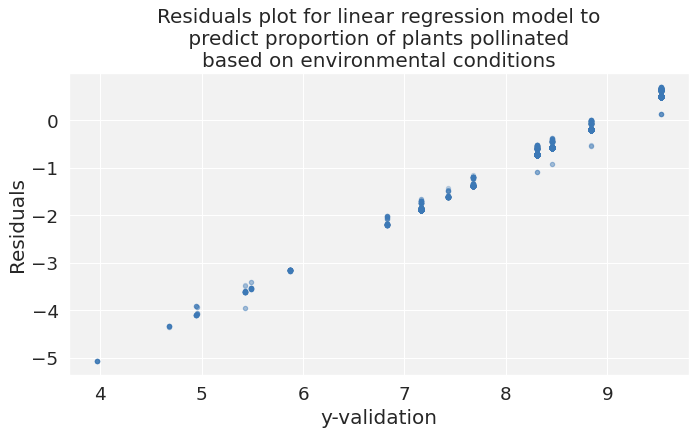

In [ ]:
# plot the relationship
# residuals = np.array(np.log(y_validation) - np.log(y_validation_fitted))
# plt.scatter(np.log(y_validation), residuals, s = 15, alpha = 0.25)



# plot the relationship
residuals = np.array(np.log(y_validation) - np.log(y_validation_fitted))
plt.figure(figsize = (10, 5), dpi = 80)

plt.scatter(np.log(y_validation), residuals, s = 15, alpha = 0.25)
plt.ylabel("Residuals");
plt.xlabel("y-validation");
plt.title("Residuals plot for linear regression model to\n predict proportion of plants pollinated \nbased on environmental conditions");
plt.savefig("Figure5.png", bbox_inches = "tight")

In [ ]:
import scipy
result = scipy.stats.linregress(X_validation[:, 0], y_validation_fitted[:, 0])
result

LinregressResult(slope=-1378.8618406028768, intercept=8354.172185430463, rvalue=-0.4989483633999227, pvalue=2.9003737670599807e-272, stderr=36.34584912974586, intercept_stderr=5.939349825823009)